In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes =True,style='darkgrid')

In [192]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [193]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [194]:
df.shape

(5000, 14)

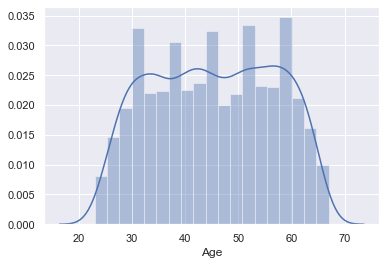

In [195]:
sns.distplot(df['Age'])

#### the distribution of age looks quite normally distributed .
#### most of the people in dataset have an age between 30 to 60 years

In [200]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

#### There are some negative values in experience because of undergrad's but it is good to consider there Experience as zero than negative value.So replacing negative values with 0.

In [269]:
df['Experience'] = df['Experience'].replace({-1:0,-2:0,-3:0})

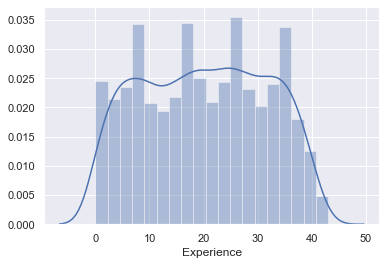

In [270]:
sns.distplot(df['Experience'])

#### the distribution of age looks quite normally distributed

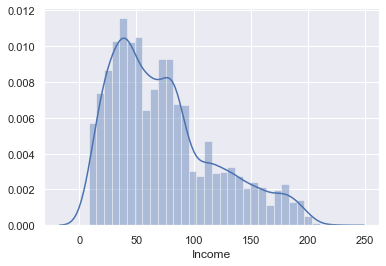

In [203]:
sns.distplot(df['Income'])

#### the distribution of income here is highly right skewed

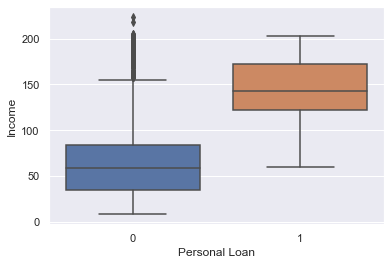

In [204]:
sns.boxplot(df['Personal Loan'],df['Income'])

#### It looks quite clear that most of the people who accepted the personal loan have high income.

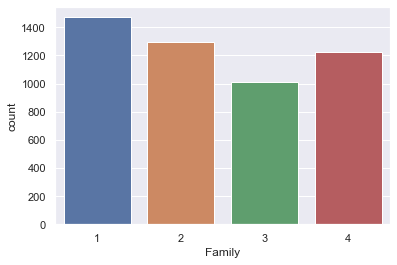

In [205]:
sns.countplot(df['Family'])

#### In the dataset there are more single individual people compared to others.

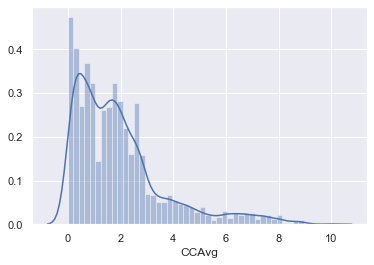

In [206]:
sns.distplot(df['CCAvg'])

#### The average spending on credit cards per month distribution is right skewed.

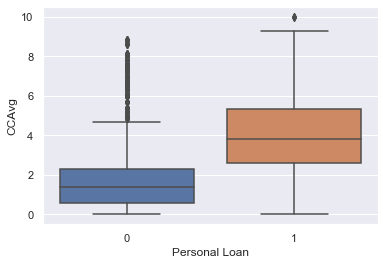

In [207]:
sns.boxplot(df['Personal Loan'],df['CCAvg'])

#### It looks like people who accepted the personal loans are spending a lot on credit cards.

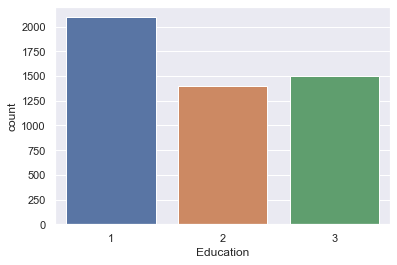

In [208]:
sns.countplot(df['Education'])

####  Education : Education Level.
1. Undergrad
2. Graduate
3. Advanced/Professional
#### In the dataset there are more under graduated people with respect to others

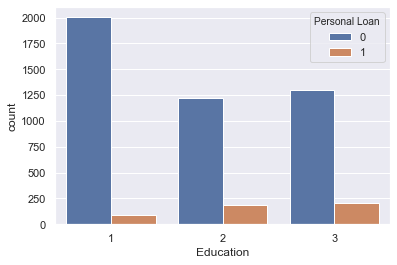

In [209]:
sns.countplot(df['Education'],hue=df['Personal Loan'])

#### It also seems that very few under graduated people have accepted the personal loans

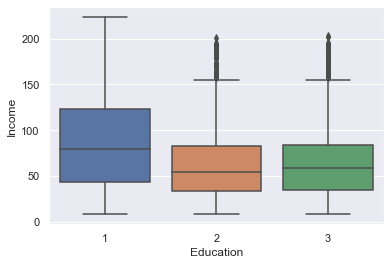

In [210]:
sns.boxplot(df['Education'],df['Income'])

#### It is quite intresting to see that under graduated people earning more income.

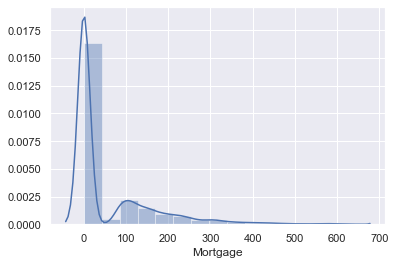

In [211]:
sns.distplot(df['Mortgage'],bins=15)

#### It looks like very few people have house mortgage with bank

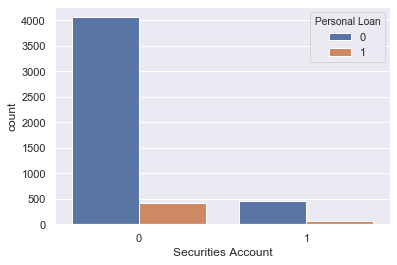

In [212]:
sns.countplot(df['Securities Account'],hue=df['Personal Loan'])

#### Lot of people here don't have any Securities Account with the bank

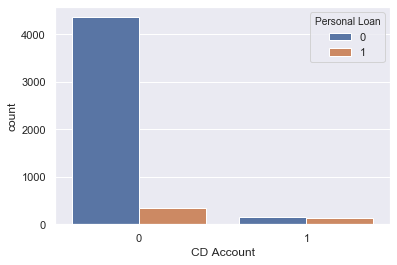

In [213]:
sns.countplot(df['CD Account'],hue=df['Personal Loan'])

#### Lot of people also don't have CD Account with the bank

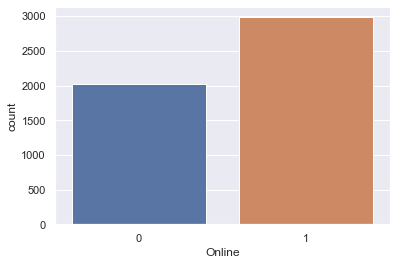

In [214]:
sns.countplot(df['Online'])

#### Most of the people use online internet banking facilities

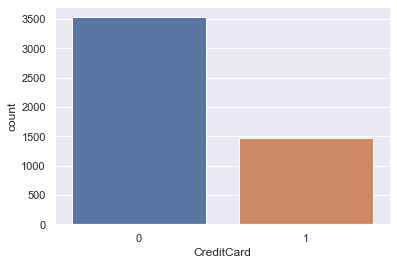

In [215]:
sns.countplot(df['CreditCard'])

#### It looks only few people use credit card isssued by Universal Bank

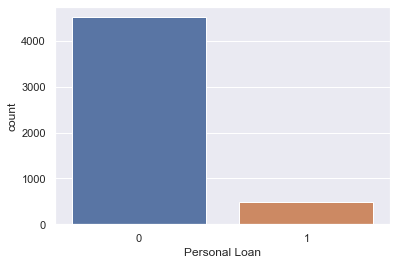

In [216]:
sns.countplot(df['Personal Loan'])

#### Among 5000 customers it seems only ten percent of them have accepted the personal loans.By understanding this data the bank management can convert more of its liable customers into personal loan customers.It is good if bank management target people with high income, well educated and people who spend a lot on credit cards for converting its liable customers into personal loan customers then there will be high success ratio with minimal budget.

In [217]:
corr = df.corr()

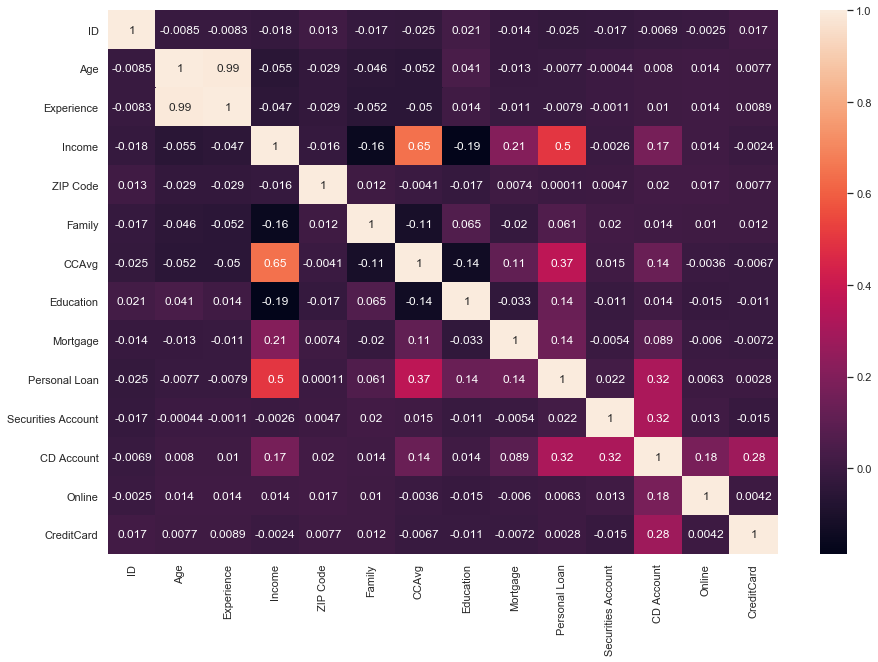

In [218]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

#### It is better to drop ZIP Code column as it has no corelation with target variable

In [219]:
# seperating the columns into explanatory and target columns
X = df.drop(['ID','ZIP Code','Personal Loan'],axis=1)
y = df['Personal Loan']

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
#splitting the data in 70-30 ratio
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [222]:
from sklearn.preprocessing import StandardScaler

In [223]:
scaler = StandardScaler()

In [224]:
xs_train = scaler.fit_transform(x_train)
xs_test = scaler.fit_transform(x_test)

### First model:LogisticRegression-model

In [225]:
#Training Logistic Regressoion as our first model
from sklearn.linear_model import LogisticRegression

In [226]:
logit = LogisticRegression(random_state=0,class_weight='balanced')

In [227]:
model = logit.fit(xs_train,y_train)

In [228]:
y_pred = model.predict(xs_test)

In [229]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,f1_score

In [230]:
accuracy_score(y_test,y_pred)

0.892

In [231]:
recall_score(y_test,y_pred)

0.8657718120805369

In [232]:
precision_score(y_test,y_pred)

0.47601476014760147

In [233]:
f1_score(y_test,y_pred)

0.6142857142857143

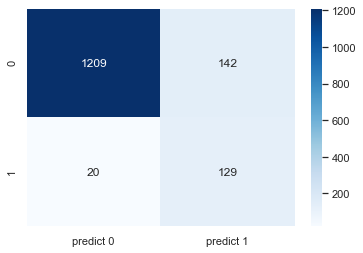

In [234]:
matrix = confusion_matrix(y_test,y_pred,labels=[0,1])
cm = pd.DataFrame(matrix,index=[i for i in [0,1]],columns = [i for i in ['predict 0','predict 1']])
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.5g')

In [235]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [236]:
y_test.value_counts()

0    1351
1     149
Name: Personal Loan, dtype: int64

In [237]:
#roc curve helps to understand how our model performs at different thresholds
from sklearn.metrics import roc_curve,roc_auc_score

In [238]:
y_proba = model.predict_proba(xs_test)[:,1]

In [239]:
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,y_proba)

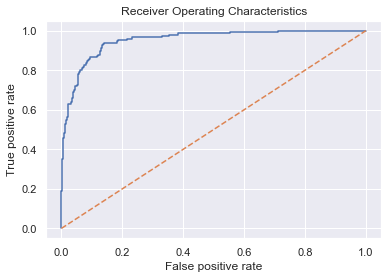

In [240]:
#plot roc curve
plt.title("Receiver Operating Characteristics")
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [241]:
roc_auc_score(y_test,y_proba)

0.9525829735865554

### Second Model:KNeighborsClassifier-model2

In [242]:
from sklearn.neighbors import KNeighborsClassifier

In [243]:
#using GridSearchCV to find the best n_neighbors parameter
from sklearn.model_selection import GridSearchCV

In [244]:
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1,weights='distance')

In [245]:
search_space = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}]

In [246]:
classifier = GridSearchCV(knn,search_space,cv=5).fit(xs_train,y_train)

In [247]:
classifier.best_estimator_.get_params()['n_neighbors']

4

In [248]:
KNN = KNeighborsClassifier(n_neighbors=4,n_jobs=-1,weights='distance')

In [249]:
model2 = KNN.fit(xs_train,y_train)

In [250]:
y_pred2 = model2.predict(xs_test)

In [251]:
accuracy_score(y_test,y_pred2)

0.9586666666666667

In [252]:
recall_score(y_test,y_pred2)

0.6375838926174496

In [253]:
f1_score(y_test,y_pred2)

0.753968253968254

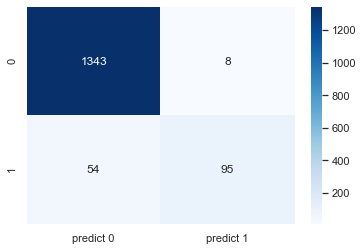

In [281]:
matrix2 = confusion_matrix(y_test,y_pred2,labels=[0,1])
cm2 = pd.DataFrame(matrix2,index=[i for i in [0,1]],columns = [i for i in ['predict 0','predict 1']])
sns.heatmap(cm2,annot=True,cmap='Blues',fmt='.5g')

In [255]:
y_proba2 = model2.predict_proba(xs_test)[:,1]

In [256]:
FPR,TPR,THRES = roc_curve(y_test,y_proba2)

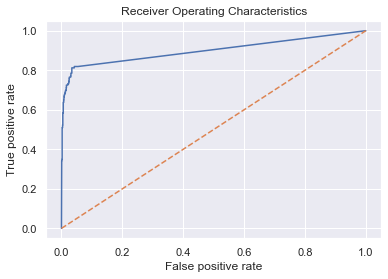

In [257]:
#plot roc curve
plt.title("Receiver Operating Characteristics")
plt.plot(FPR,TPR)
plt.plot([0,1],ls='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [258]:
roc_auc_score(y_test,y_proba2)

0.899562342584911

### Third model:Naive Bayes-model3

In [271]:
from sklearn.naive_bayes import GaussianNB

In [272]:
NB = GaussianNB()

In [273]:
model3 = NB.fit(xs_train,y_train)

In [274]:
y_pred3 = model3.predict(xs_test)

In [275]:
accuracy_score(y_test,y_pred3)

0.8713333333333333

In [276]:
f1_score(y_test,y_pred3)

0.46537396121883656

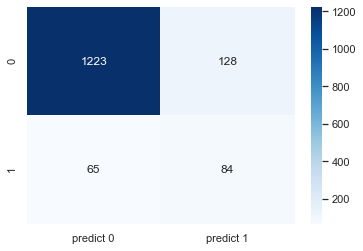

In [282]:
matrix3 = confusion_matrix(y_test,y_pred3,labels=[0,1])
cm3 = pd.DataFrame(matrix3,index=[i for i in [0,1]],columns = [i for i in ['predict 0','predict 1']])
sns.heatmap(cm3,annot=True,cmap='Blues',fmt='.5g')

In [283]:
y_proba3 = model3.predict_proba(xs_test)[:,1]

In [284]:
fpr,tpr,thres = roc_curve(y_test,y_proba)

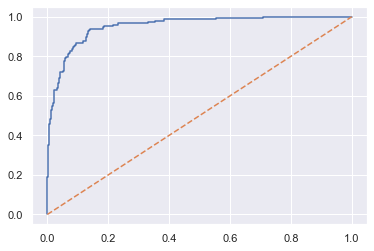

In [285]:
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')

In [286]:
roc_auc_score(y_test,y_proba3)

0.914182385406783

### Among the three models Naive Bayes model perfoms worse compared to others. It seems our first two models (LogisticRegression model and KNeighborsClassifier) perfoms pretty good with the dataset. In this case our first model (LogisticRegression model) is the best model to use. Beacuse even though the accuracy score for KNeighborsClassifier is more than Logistic Regression model ,recall score for Logistic Regression is very much better than any other model.
### Here for the bank management the cost of False Negatives is much higher than False positives which means predicting people who accept loan as people who doesn't accept the loan will cost much more to the bank as it reduces their success ratio and waste thier campaign budget. Even though the model predicts more false positives it doen't cost much. 
### The roc_auc_score also suggests that our logistic regression model performs better than other models.


##                                                           -THE END-